In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from dmba import plotDecisionTree, classificationSummary

In [3]:
# Import the datasets
df_EVPopulation = pd.read_csv('/Users/cheryl/Desktop/IE7275/Project/Dataset/1. Electric_Vehicle_Population_Data.csv')
df_EVRegistration = pd.read_csv('/Users/cheryl/Desktop/IE7275/Project/Dataset/2. Electric_Vehicle_Title_and_Registration_Activity.csv')


# Remove missing values
df_EVPopulation = df_EVPopulation.dropna()
df_EVRegistration = df_EVRegistration.dropna()

In [82]:
df_EVPopulation.info
df_EVPopulation.head()

<bound method DataFrame.info of         VIN (1-10)        County               City State  Postal Code  \
0       KM8K33AGXL          King            Seattle    WA      98103.0   
1       1C4RJYB61N          King            Bothell    WA      98011.0   
2       1C4RJYD61P        Yakima             Yakima    WA      98908.0   
3       5YJ3E1EA7J          King           Kirkland    WA      98034.0   
4       WBY7Z8C5XJ      Thurston            Olympia    WA      98501.0   
...            ...           ...                ...   ...          ...   
150477  WBY43AW05P  Grays Harbor          Montesano    WA      98563.0   
150478  5YJ3E1EB7P          King            Seattle    WA      98104.0   
150479  5YJYGDEEXM          King            Seattle    WA      98109.0   
150480  5UXTA6C08P     Snohomish  Mountlake Terrace    WA      98043.0   
150481  7SAYGDEF8N        Skagit       Mount Vernon    WA      98273.0   

        Model Year     Make           Model  \
0             2020  HYUNDAI     

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


In [34]:
# Focus on the Electric Vehicle Type distribution condition
# Data processing

# Organize the data and keep necessary columns
df_EVPopulation_2 = df_EVPopulation.loc[:, 'County': 'Electric Range']

In [35]:
# Group the vehicle count by the Electric Vehicle Type
df_type = df_EVPopulation_2.groupby(['Electric Vehicle Type']).size().reset_index(name='Vehicle Count')
df_type

,Electric Vehicle Type,Vehicle Count
0,Battery Electric Vehicle (BEV),116583
1,Plug-in Hybrid Electric Vehicle (PHEV),33554


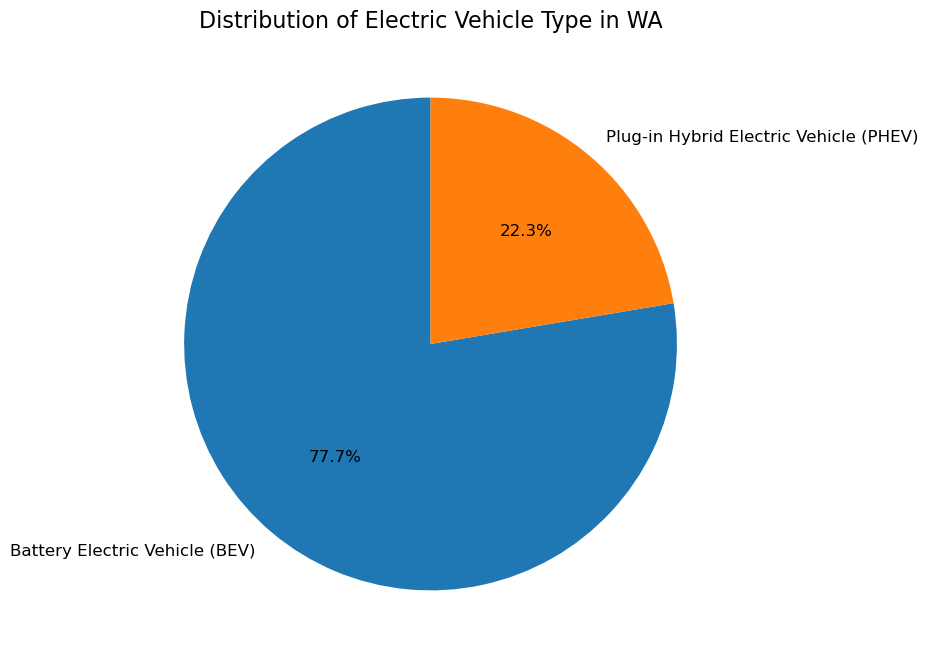

In [36]:
# Plot the Electric Vehicle Type in pie chart
plt.figure(figsize=(12, 8))
plt.pie(df_type['Vehicle Count'], labels=df_type['Electric Vehicle Type'], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
plt.title('Distribution of Electric Vehicle Type in WA', fontsize=16)
plt.show()

**KEY FINDINGS**

The pie chart above illustrates the dominance of Battery Electric Vehicles (BEVs) in Washington State's electric vehicle landscape, accounting for a substantial 77.7%. This indicates a higher penetration of Pure Electric Vehicles compared to Plug-in Hybrid Electric Vehicles (PHEVs).

In [37]:
# Focus on the Electric Vehicle Make's distribution
# Group the count by the Make
df_make = df_EVPopulation.groupby(['Make']).size().reset_index(name='Vehicle Count')

# Sort the DataFrame by Vehicle Count in descending order
df_make = df_make.sort_values(by='Vehicle Count', ascending=False)
df_make.head()

,Make,Vehicle Count
31,TESLA,68821
25,NISSAN,13481
6,CHEVROLET,12003
10,FORD,7592
4,BMW,6426


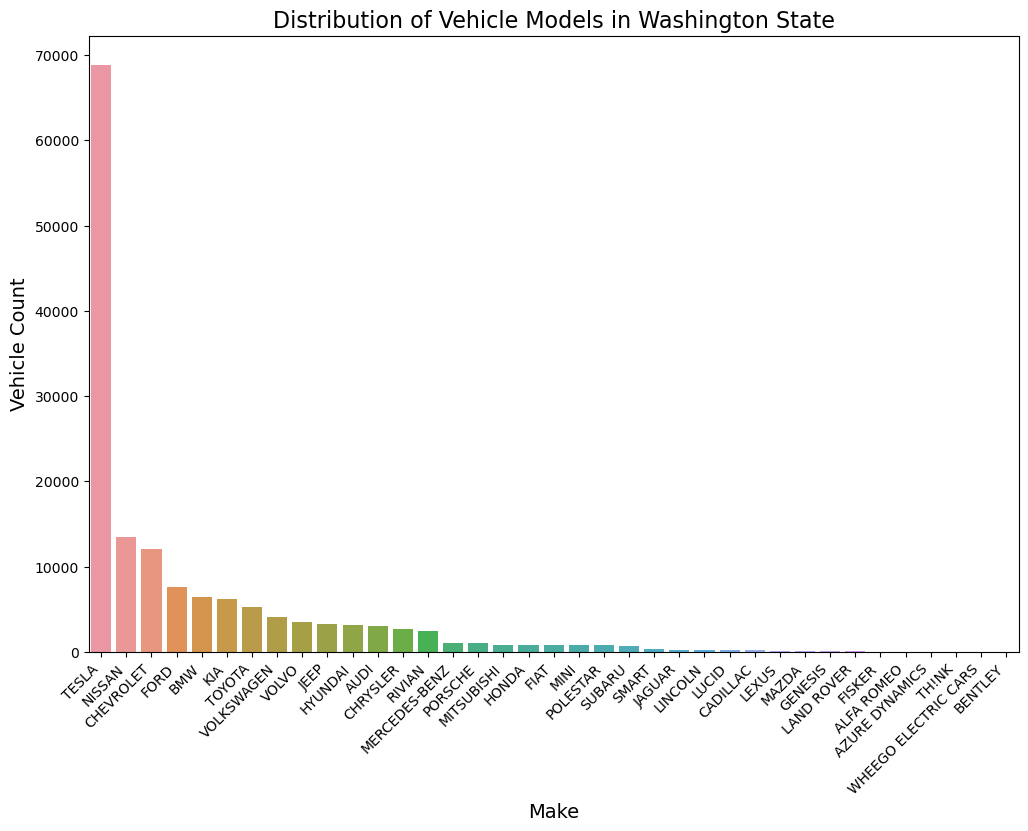

In [38]:
# Plot a bar chart to see the Make Distribution
plt.figure(figsize=(12, 8))
sns.barplot(x='Make', y='Vehicle Count', data=df_make, dodge=True)
plt.xlabel('Make', fontsize=14)
plt.ylabel('Vehicle Count', fontsize=14)
plt.title('Distribution of Vehicle Models in Washington State', fontsize=16)

# Adjust font size and rotation for x-axis tick labels
plt.xticks(rotation=45, ha='right', fontsize=10)  

plt.show()

# Plot a pie chart for the Make Distribution
plt.figure(figsize=(12, 8))
plt.pie(df_make['Vehicle Count'], labels=df_make['Make'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Vehicle Models in Washington State', fontsize=16)
plt.show()

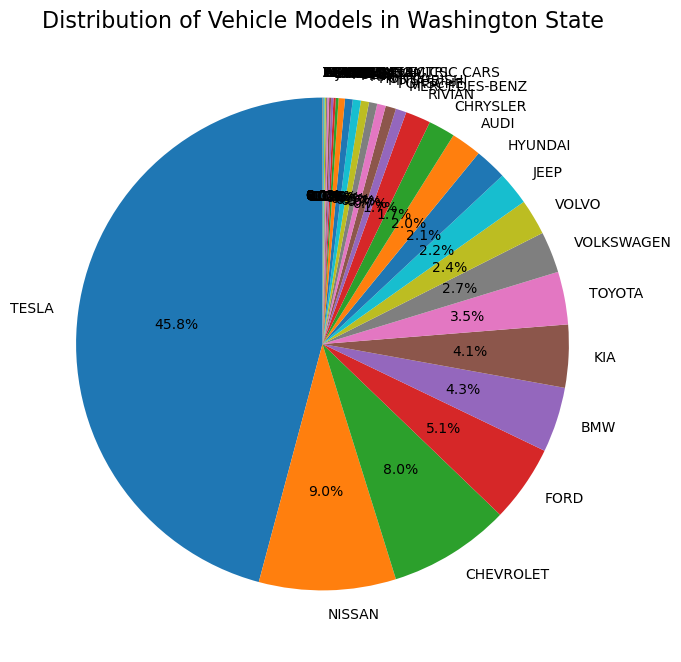

**KEY FINDINGS**

The top 5 Electric Vehicle (EV) manufacturers in Washington State include Tesla, Nissan, Chevrolet, Ford, and BMW. Tesla stands out as the market leader, holding a substantial market share of approximately 45.8%. This share is nearly four times larger than that of the second and third-place contenders, Nissan and Chevrolet.

Notably, traditional gasoline vehicle manufacturers such as BMW, Toyota, Mercedes-Benz, Porsche, and others are actively venturing into the EV market. While their market share is comparatively smaller than Tesla's, their entry into the electric vehicle segment reflects a growing interest and potential in EV development.

In [39]:
# Focus on the Electric Vehicle distribution by county and we would like to show it on the Washington Map
# Group the count by County
df_county = df_EVPopulation.groupby(['County']).size().reset_index(name='Vehicle Count')

# Sort the DataFrame by Vehicle Count in descending order
df_county = df_county.sort_values(by='Vehicle Count', ascending=False)


In [40]:
# import the GEOJson file of Washington State
geojason_path = '/Users/cheryl/Desktop/IE7275/Project/Dataset/WA_County_Boundaries.geojson'
wa_county = gpd.read_file(geojason_path)

# Rename columns
wa_county = wa_county.rename(columns={'JURISDICT_LABEL_NM': 'County'})

/var/folders/01/5t1k4q8x5rz3wctxd57pk8d40000gn/T/ipykernel_86413/1210529769.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(df_merged.geometry.centroid.x, df_merged.geometry.centroid.y, df_merged['County']):


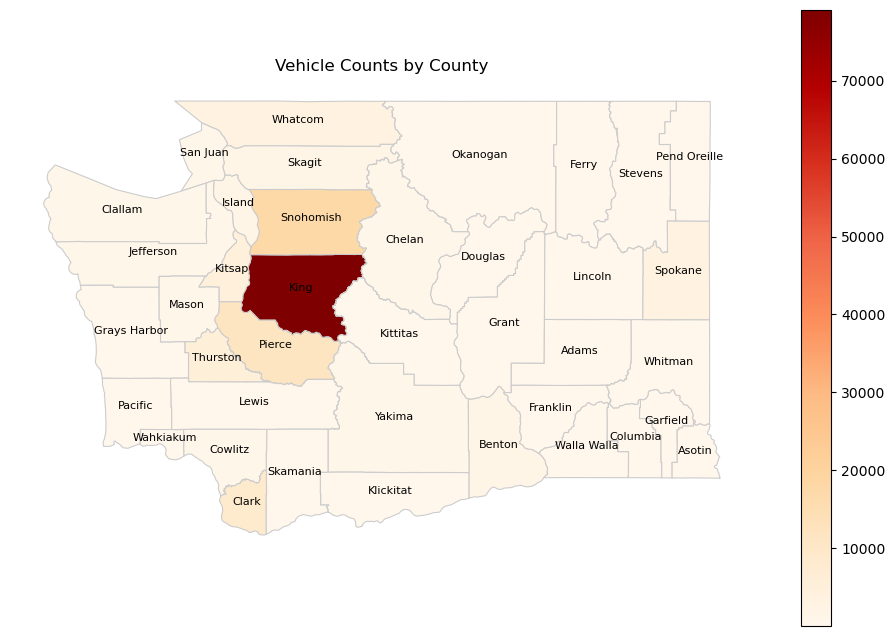

In [41]:
# Merge the county dataset with the GEOJson file
df_merged = wa_county.merge(df_county, on='County', how = 'left')

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
df_merged.plot(column='Vehicle Count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Annotate with county names
for x, y, label in zip(df_merged.geometry.centroid.x, df_merged.geometry.centroid.y, df_merged['County']):
    ax.text(x, y, label, fontsize=8, ha='center')

ax.set_title('Vehicle Counts by County')
ax.set_axis_off()

plt.show()

# Plot a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='County', y='Vehicle Count', data=df_county10)
plt.xlabel('County', fontsize=14)
plt.ylabel('Vehicle Count', fontsize=14)
plt.title('Distribution of Vehicle Models in WA across Counties', fontsize=16)

# Adjust font size and rotation for x-axis tick labels
plt.xticks(rotation=45, ha='right', fontsize=12)  

plt.show()

In [79]:
# Select to top 10 County with Electric Vehicles
df_county10 = df_county.head(10)

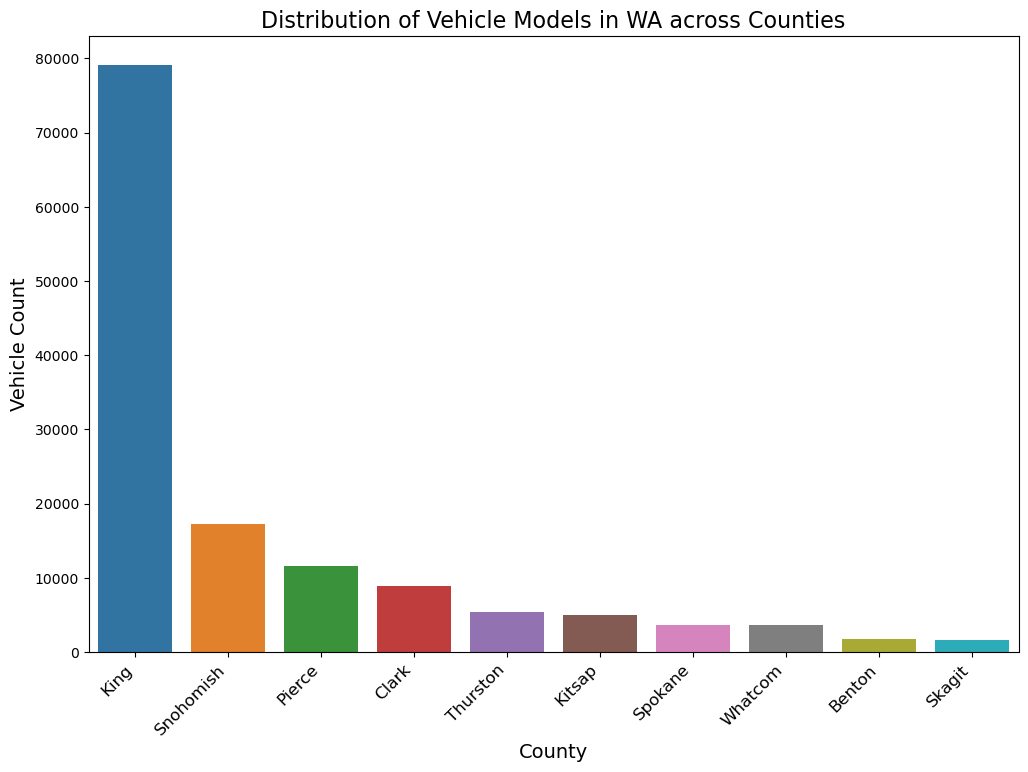

**KEY FINDINGS**
Both the choropleth map and the accompanying bar chart highlight that the majority of Electric Vehicles are concentrated in King County, comprising nearly 80,000 units. This trend extends to its neighboring counties, Snohomish and Pierce, indicating an intense concentration of electric vehicles in specific areas within Washington State.

In [ ]:
# We would likt to see how the Electric Utility distrubute in Washington State, so we use another dataset

In [57]:
df_EVRegistration.info

<bound method DataFrame.info of            Clean Alternative Fuel Vehicle Type  VIN (1-10)  DOL Vehicle ID  \
21              Battery Electric Vehicle (BEV)  7SAYGDEE0P       245533788   
23              Battery Electric Vehicle (BEV)  7SAYGDEEXN       217942665   
36              Battery Electric Vehicle (BEV)  WP0CD2Y19P       231192062   
69              Battery Electric Vehicle (BEV)  5YJYGDEE9M       148917023   
75      Plug-in Hybrid Electric Vehicle (PHEV)  KNDCC3LD9J       287924640   
...                                        ...         ...             ...   
808532          Battery Electric Vehicle (BEV)  7SAXCAE50N       205397972   
808536          Battery Electric Vehicle (BEV)  7FCTGAAA6P       251288579   
808542          Battery Electric Vehicle (BEV)  7SAYGDEFXP       241482874   
808565          Battery Electric Vehicle (BEV)  7FCTGAAAXP       244483718   
808584          Battery Electric Vehicle (BEV)  YV4ED3GM1P       245550882   

        Model Year     Make    

In [95]:
df_EVRegistration.head()
df_EVRegistration.info

<bound method DataFrame.info of            Clean Alternative Fuel Vehicle Type  VIN (1-10)  DOL Vehicle ID  \
21              Battery Electric Vehicle (BEV)  7SAYGDEE0P       245533788   
23              Battery Electric Vehicle (BEV)  7SAYGDEEXN       217942665   
36              Battery Electric Vehicle (BEV)  WP0CD2Y19P       231192062   
69              Battery Electric Vehicle (BEV)  5YJYGDEE9M       148917023   
75      Plug-in Hybrid Electric Vehicle (PHEV)  KNDCC3LD9J       287924640   
...                                        ...         ...             ...   
808532          Battery Electric Vehicle (BEV)  7SAXCAE50N       205397972   
808536          Battery Electric Vehicle (BEV)  7FCTGAAA6P       251288579   
808542          Battery Electric Vehicle (BEV)  7SAYGDEFXP       241482874   
808565          Battery Electric Vehicle (BEV)  7FCTGAAAXP       244483718   
808584          Battery Electric Vehicle (BEV)  YV4ED3GM1P       245550882   

        Model Year     Make    

In [60]:
# Data processing
# Group the vehicle count by the Electric Utility
df_EUtility = df_EVRegistration.groupby(['Electric Utility']).size().reset_index(name='Vehicle Count')

# Sort the DataFrame by Vehicle Count in descending order
df_EUtility = df_EUtility.sort_values(by='Vehicle Count', ascending=False)

# Keep the top 10 Electric Utility Location
df_EUtility10 = df_EUtility.head(10)
df_EUtility10

,Electric Utility,Vehicle Count
72,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),38672
71,PUGET SOUND ENERGY INC,19841
56,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),18097
35,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5676
19,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,4604
73,PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,1957
2,BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,1540
30,BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOH...,830
63,PACIFICORP,707
33,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF B...,659


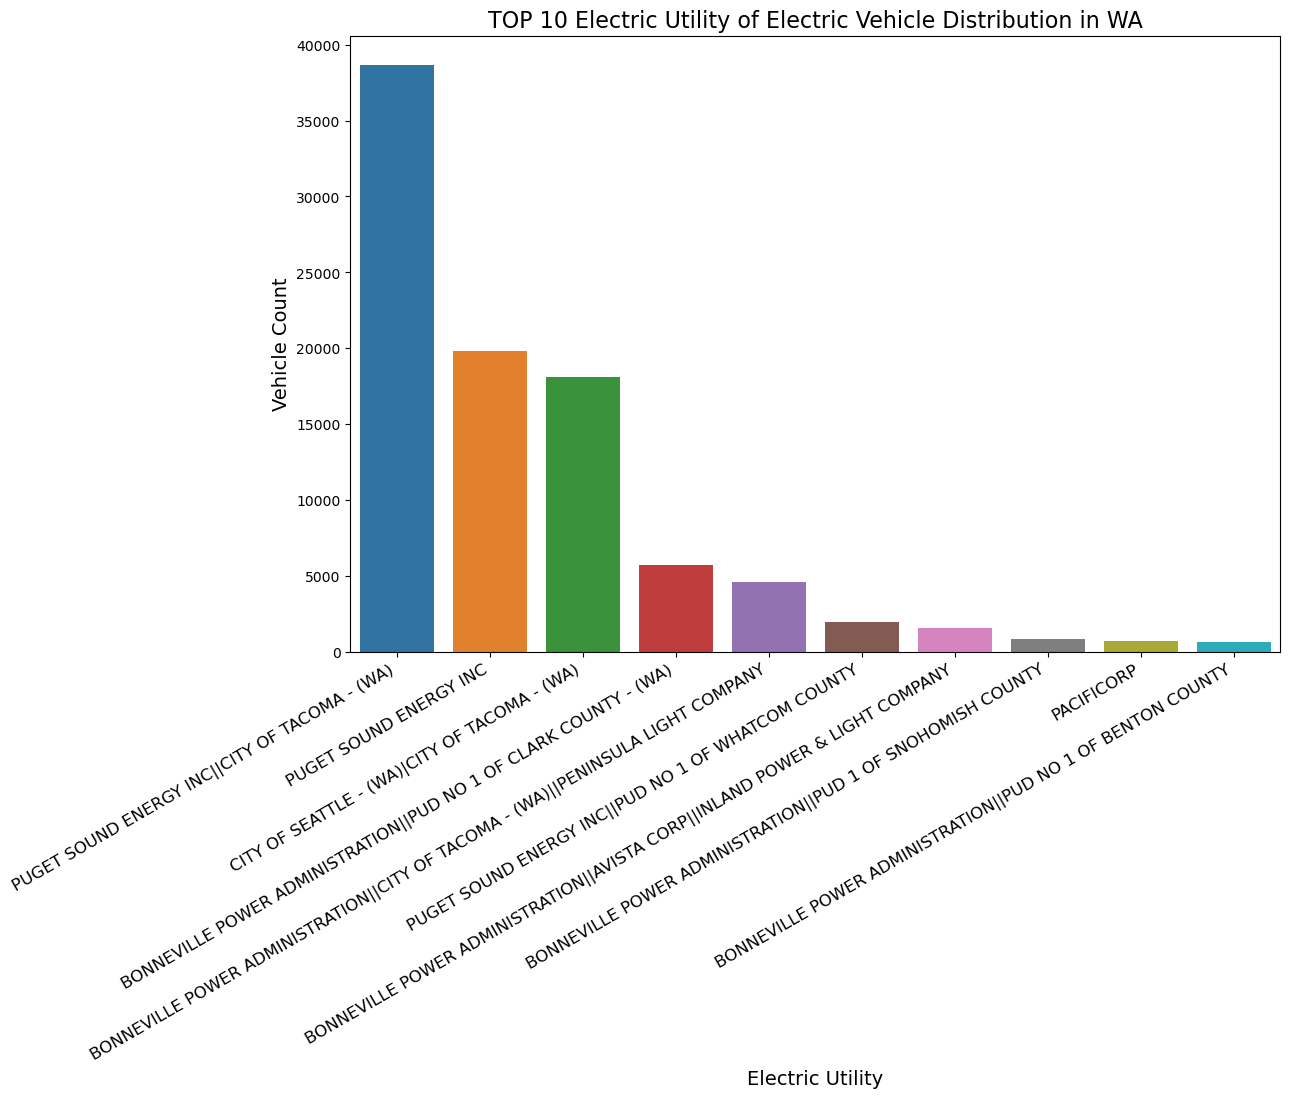

In [61]:
# Plot a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Electric Utility', y='Vehicle Count', data=df_EUtility10)
plt.xlabel('Electric Utility', fontsize=14)
plt.ylabel('Vehicle Count', fontsize=14)
plt.title('TOP 10 Electric Utility of Electric Vehicle Distribution in WA', fontsize=16)

# Adjust font size and rotation for x-axis tick labels
plt.xticks(rotation=30, ha='right', fontsize=12)  

plt.show()

**KEY FINDINGS**

The bar chart underscores that the Electric Vehicle market in Washington State is predominantly served by the top three companies: Puget Sound Energy of Tacoma, Puget Sound Energy Inc, and City of Seattle. Notably, these companies are located in the three counties with the highest concentration of electric vehicles, reinforcing their significant role in the electric utility landscape.


### ***Model Exploration and Implementation*** ###

In [62]:
df_EVPopulation.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


/var/folders/01/5t1k4q8x5rz3wctxd57pk8d40000gn/T/ipykernel_86413/1831887748.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_EVPopulation.corr()


<Axes: >

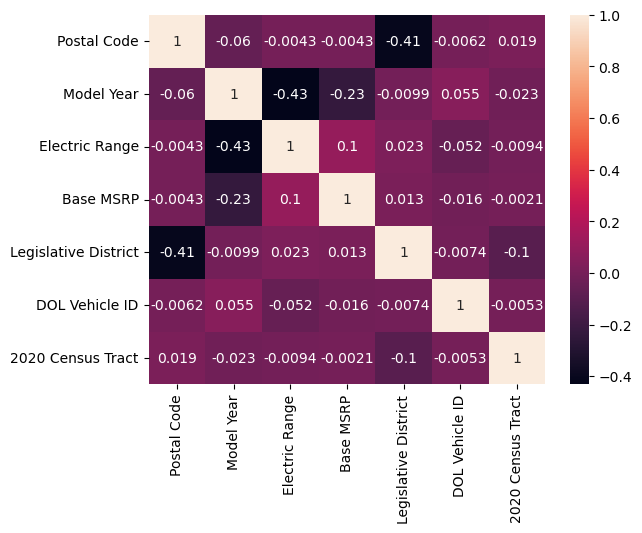

In [63]:
# Data correlation exploration
corr = df_EVPopulation.corr()
sns.heatmap(corr, annot = True)

The colleration betweeen every two columns are relatively low. 

/var/folders/01/5t1k4q8x5rz3wctxd57pk8d40000gn/T/ipykernel_86413/3323267594.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_2 = df_EVRegistration.corr()


<Axes: >

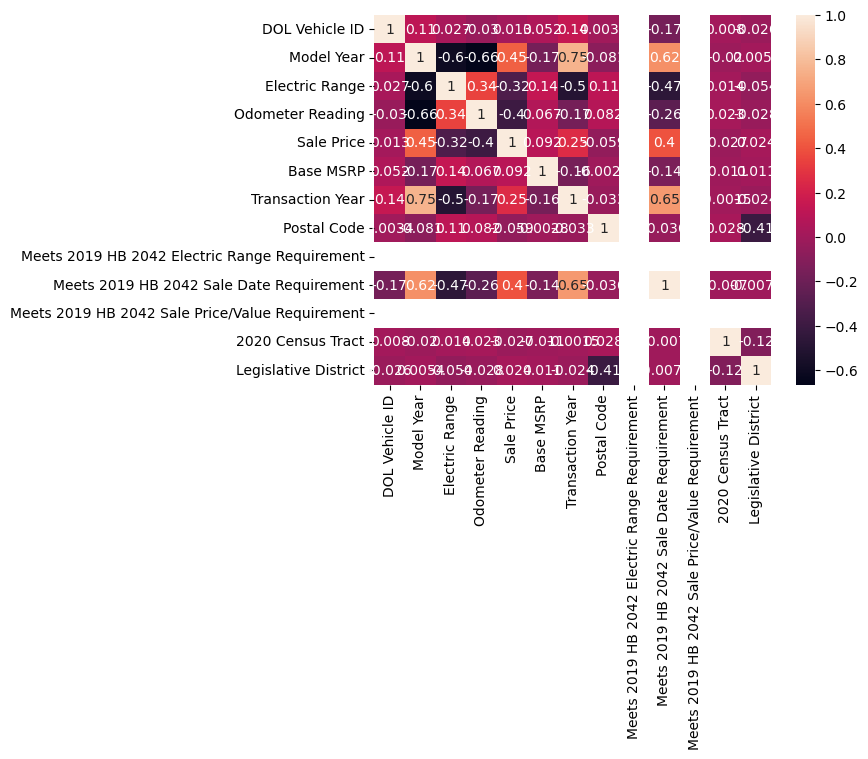

In [64]:
corr_2 = df_EVRegistration.corr()
sns.heatmap(corr_2, annot = True)

From the Black squeres we can see that the Electric Range and Odometer Reading are positively related to the Model Year respectively.

In [70]:
# Take Odometer Reading and Model Year to apply PCA

X = df_EVRegistration[[ 'Odometer Reading']]
y = df_EVRegistration['Model Year']

# One-hot encode the categorical features 'Make'
encoder = OneHotEncoder(sparse=False, drop='first') 
X_encoded = encoder.fit_transform(X)

# Encode the categorical target variable 'Model'
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

/Users/cheryl/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [73]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [ ]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

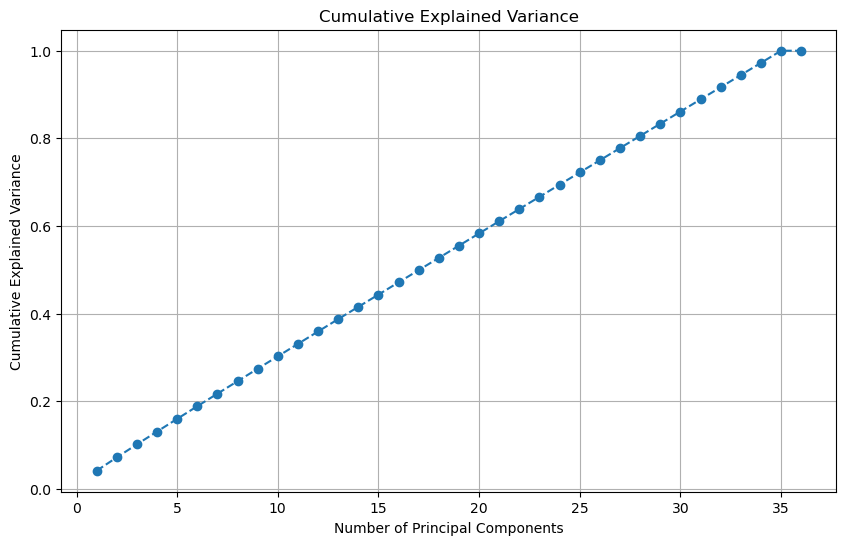

In [75]:
# plot the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [76]:
# # Consider using PCA

# X = df_EVPopulation[[ 'Make']]
# y = df_EVPopulation['Model']

# # One-hot encode the categorical features 'Make'
# encoder = OneHotEncoder(sparse=False, drop='first') 
# X_encoded = encoder.fit_transform(X)

# # Encode the categorical target variable 'Model'
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)

/Users/cheryl/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [77]:
# # Standardize the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_encoded)

In [78]:
# # Apply PCA
# pca = PCA()
# X_pca = pca.fit_transform(X_scaled)

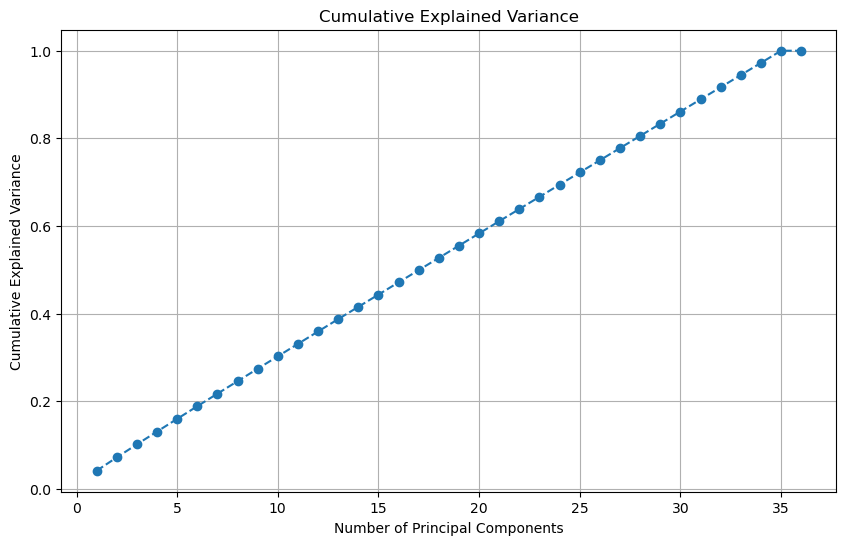

In [79]:
# # plot the explained variance ratio
# explained_variance_ratio = pca.explained_variance_ratio_
# cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# plt.figure(figsize=(10, 6))
# plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
# plt.title('Cumulative Explained Variance')
# plt.xlabel('Number of Principal Components')
# plt.ylabel('Cumulative Explained Variance')
# plt.grid(True)
# plt.show()

If there is no clear elbow point in the Cumulative Explained Variance (CEV) plot, it means that the rate at which additional principal components contribute to the cumulative explained variance is relatively consistent, and there is no distinct point where adding more components provides diminishing returns. 

In [117]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Standardize or normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Linear Discriminant Analysis classifier
lda_classifier = LinearDiscriminantAnalysis()

# Train the model on the scaled training set
lda_classifier.fit(X_train_scaled, y_train)

LinearDiscriminantAnalysis()

In [118]:
# Evaluate the model on the scaled test set
accuracy = lda_classifier.score(X_test_scaled, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.4274391177822025


In [119]:
# Predictions on the test set
y_pred = lda_classifier.predict(X_test_scaled)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        80
           1       0.00      0.00      0.00        89
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         2
           5       0.00      0.00      0.00        63
           6       0.00      0.00      0.00       244
           7       0.47      1.00      0.64      1143
           8       0.00      0.00      0.00        28
           9       0.00      0.00      0.00       326
          10       0.00      0.00      0.00        73
          11       0.00      0.00      0.00       202
          12       0.05      1.00      0.09        70
          13       0.00      0.00      0.00       335
          14       0.00      0.00      0.00       162
          15       0.00      0.00      0.00        44
          16       0.00      0.00      0.00       366
          17       0.20      1.00      0.34       127
          18       0.00    

/Users/cheryl/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/cheryl/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/cheryl/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### *Key Findings* ###

Either PCA or LDA is not performing very well with this dataset. Continue on the modeling exploration.

In [13]:
# Keep the top 10 Makes
top_makes = df_EVPopulation['Make'].value_counts().index[:10]
df_top = df_EVPopulation[df_EVPopulation['Make'].isin(top_makes)]

X = df_EVPopulation[[ 'Make']]
y = df_EVPopulation['Model']

# One-hot encode the categorical features 
encoder = OneHotEncoder(sparse=False, drop='first') 
X_encoded = encoder.fit_transform(X)

# Encode the categorical target variable 'Model'
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

/Users/cheryl/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Feature names: ['Make_AUDI' 'Make_AZURE DYNAMICS' 'Make_BENTLEY' 'Make_BMW'
 'Make_CADILLAC' 'Make_CHEVROLET' 'Make_CHRYSLER' 'Make_FIAT'
 'Make_FISKER' 'Make_FORD' 'Make_GENESIS' 'Make_HONDA' 'Make_HYUNDAI'
 'Make_JAGUAR' 'Make_JEEP' 'Make_KIA' 'Make_LAND ROVER' 'Make_LEXUS'
 'Make_LINCOLN' 'Make_LUCID' 'Make_MAZDA' 'Make_MERCEDES-BENZ' 'Make_MINI'
 'Make_MITSUBISHI' 'Make_NISSAN' 'Make_POLESTAR' 'Make_PORSCHE'
 'Make_RIVIAN' 'Make_SMART' 'Make_SUBARU' 'Make_TESLA' 'Make_TH!NK'
 'Make_TOYOTA' 'Make_VOLKSWAGEN' 'Make_VOLVO' 'Make_WHEEGO ELECTRIC CARS']


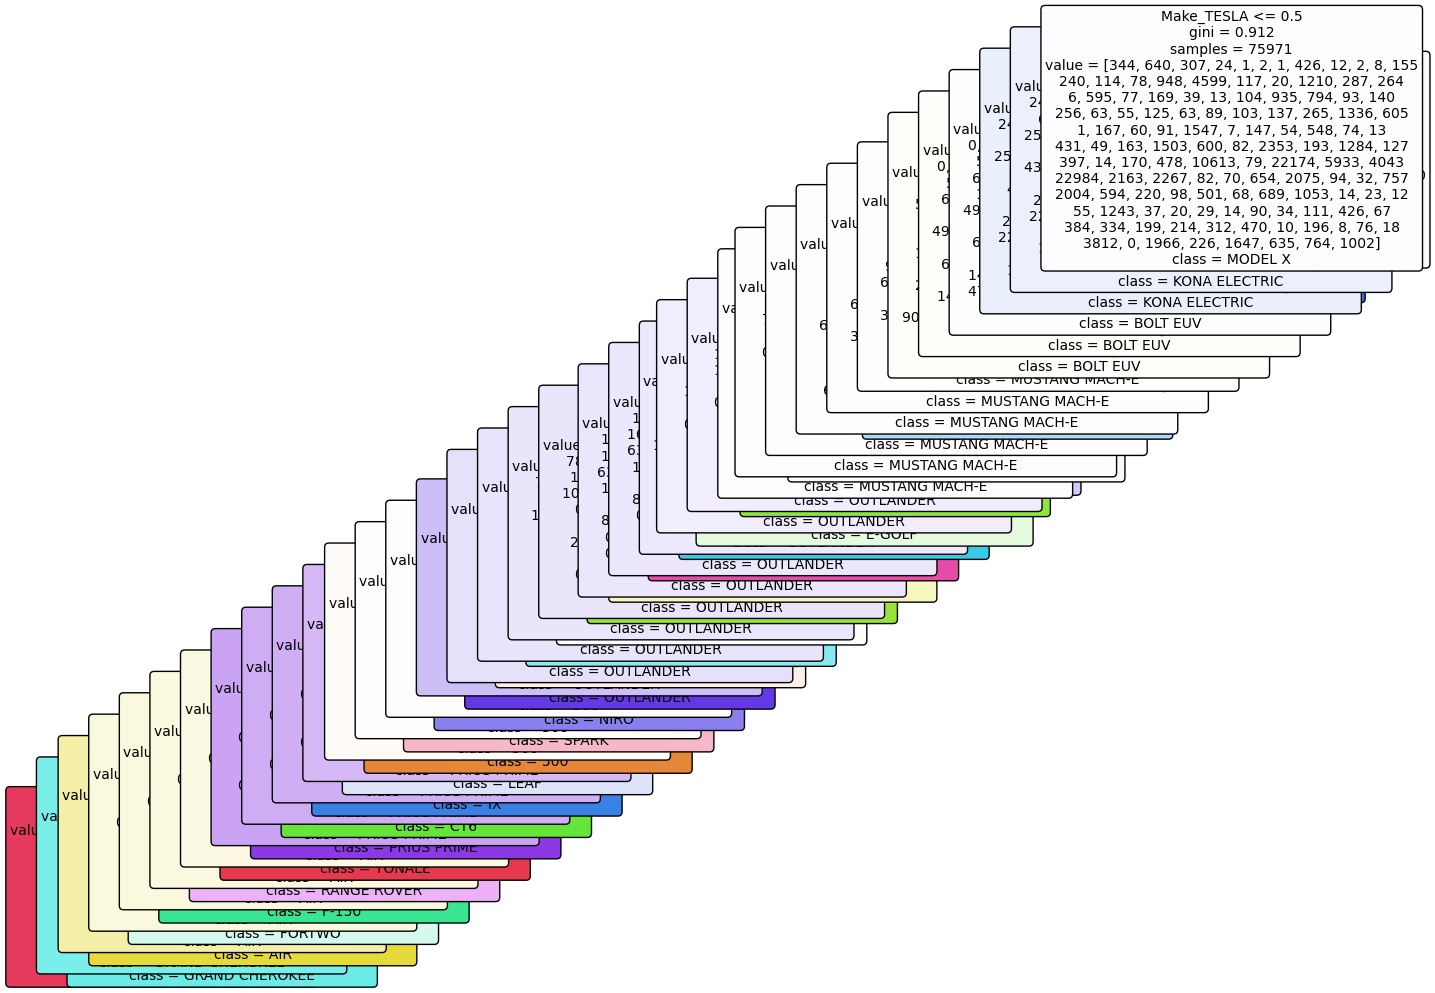

Accuracy of training set: 0.5127758952285008
Accuracy of testing set: 0.5150859198081791
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        83
           1       1.00      1.00      1.00       167
           2       0.00      0.00      0.00        84
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00       118
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         3
          11       1.00      1.00      1.00        32
          12       0.00      0.00      0.00        62
          13       0.69      1.00      0.82        31
          14       0.00      0.00      0.00         9
          15       0.00      0.00      0.00         1
          16       0.00

/Users/cheryl/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/cheryl/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/cheryl/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/cheryl/anaconda3/lib/pytho

In [25]:
# Create a Classifier for multiclass classification
clf = RandomForestClassifier(random_state=42)

# Train the model on the training set
clf.fit(X_train, y_train)

# Extract an individual tree from the forest (for example, the first tree)
individual_tree = clf.estimators_[0]

# Debugging: Check the actual feature names used for training
feature_names = encoder.get_feature_names_out(['Make'])
print("Feature names:", feature_names)

# Display the individual Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(individual_tree, filled=True, feature_names=feature_names,
          class_names=label_encoder.classes_, rounded=True, fontsize=10)
plt.show()

# Evaluate the model on both of training set and test set
accuracy_training = clf.score(X_train, y_train)
accuracy_test = clf.score(X_test, y_test)
print(f"Accuracy of training set: {accuracy_training}")
print(f"Accuracy of testing set: {accuracy_test}")

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

<function matplotlib.pyplot.show(close=None, block=None)>

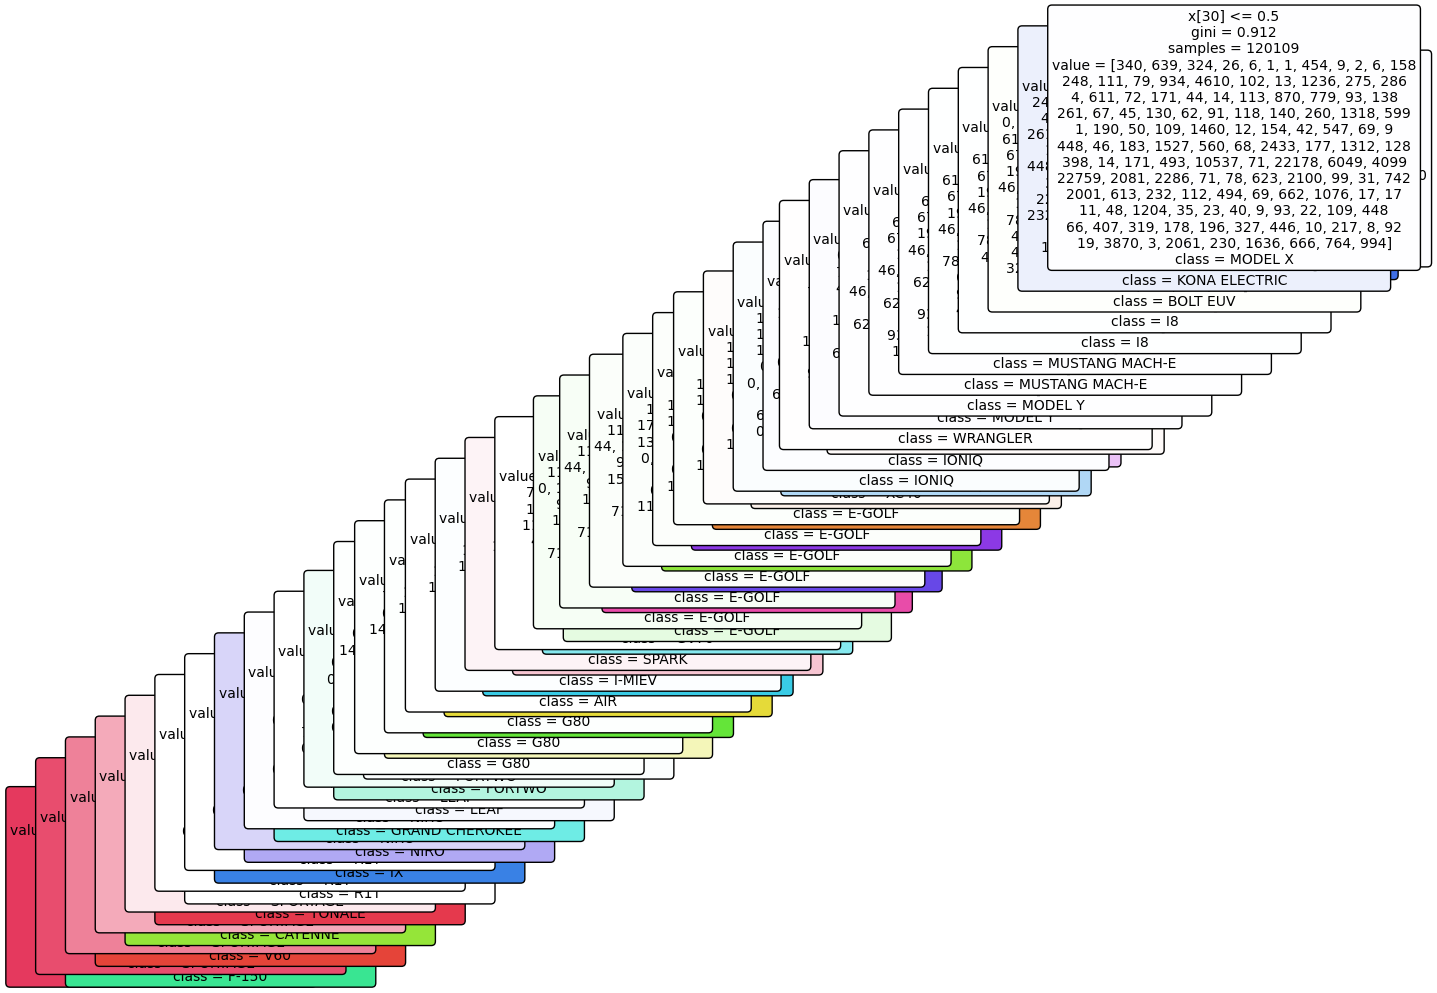

In [18]:
# Choose a Decision Tree Classifier Model
DecisionTree = DecisionTreeClassifier()

# Train the model
DecisionTree.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(DecisionTree, filled=True, class_names=label_encoder.classes_, rounded=True, fontsize=10)

plt.show

In [19]:
# Make predictions on the test set
y_pred = DecisionTree.predict(X_test)

In [21]:
# Evaluate the model accuracy 

accuracy_training = accuracy_score(y_test, y_pred)
# accuracy_test = knn.score(X_test, y_test)
print(f"Accuracy of training set: {accuracy_training}")
# print(f"Accuracy of testing set: {accuracy_test}")

Accuracy of training set: 0.5148195017983216


The performance of Desision Tree Classifier Model not ideal.

In [95]:
# Create a k-Nearest Neighbors Classifier for multiclass classification
knn = KNeighborsClassifier()

# Train the model on the training set
knn.fit(X_train, y_train)

# Evaluate the model on both of training set and test set
accuracy_training = knn.score(X_train, y_train)
accuracy_test = knn.score(X_test, y_test)
print(f"Accuracy of training set: {accuracy_training}")
print(f"Accuracy of testing set: {accuracy_test}")

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy of training set: 0.44835541430540665
Accuracy of testing set: 0.44758002756930615
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        80
           1       0.00      0.00      0.00        89
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         2
           5       0.00      0.00      0.00        63
           6       0.00      0.00      0.00       244
           7       0.47      1.00      0.64      1143
           8       0.00      0.00      0.00        28
           9       0.21      1.00      0.35       326
          10       0.00      0.00      0.00        73
          11       0.00      0.00      0.00       202
          12       0.00      0.00      0.00        70
          13       0.26      1.00      0.41       335
          14       0.00      0.00      0.00       162
          15       0.00      0.00      0.00        44
          16       0.

/Users/cheryl/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/cheryl/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/cheryl/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### *Key Findings* ###

For the evaluation of the above Classification Model and k-Nearest Neighbors Classifier Model, the accuracy for both of them is less than 50% and the precision and f1 score are relatively low and the recall value is either 0 or 1, indicating their performance in using the 'Make' to predict 'Model' is not very well. So I continue on the exploration.


In [28]:
# Keep the top 10 Utilities
top_Utility = df_EVRegistration['Electric Utility'].value_counts().index[:10]
df_topUtility = df_EVRegistration[df_EVRegistration['Electric Utility'].isin(top_Utility)]

In [34]:
X = df_topUtility[['County']]
y = df_topUtility['Electric Utility']

# One-hot encode the categorical features 
encoder = OneHotEncoder(sparse=False, drop='first') 
X_encoded = encoder.fit_transform(X)

# Encode the categorical target variable 'Model'
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

/Users/cheryl/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Create a Random Forest Classifier for multiclass classification
clf = RandomForestClassifier(random_state=42)

# Train the model on the training set
clf.fit(X_train, y_train)

# Extract an individual tree from the forest (for example, the first tree)
individual_tree = clf.estimators_[0]

# Display the individual Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(individual_tree, filled=True, feature_names=encoder.get_feature_names_out(['County']),
          class_names=label_encoder.classes_, rounded=True, fontsize=10)
plt.show()

In [93]:
# Evaluate the model on both of training set and test set
accuracy_training = clf.score(X_train, y_train)
accuracy_test = clf.score(X_test, y_test)
print(f"Accuracy of training set: {accuracy_training}")
print(f"Accuracy of testing set: {accuracy_test}")

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy of training set: 0.7634407150379391
Accuracy of testing set: 0.7627585462007884
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       308
           1       0.60      0.99      0.75       901
           2       0.00      0.00      0.00       154
           3       0.99      1.00      1.00       111
           4       1.00      1.00      1.00      1140
           5       0.00      0.00      0.00      3635
           6       1.00      0.99      1.00       145
           7       0.96      1.00      0.98      3966
           8       0.66      0.92      0.77      7791
           9       1.00      1.00      1.00       366

    accuracy                           0.76     18517
   macro avg       0.72      0.79      0.75     18517
weighted avg       0.63      0.76      0.68     18517



/Users/cheryl/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/cheryl/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/cheryl/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### *Key Findings* ###

From the evaluation of the classification model, we can see the the accuracy is around 76% and the precision and f1 score is bewteen 59% to 100%, recall value is more than 90%, illustrating that the performance is better to use 'County' to predict the 'Electric Utility'.